# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1718671053685.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,06/14/2024,5431.60,5424.08,5432.39,5403.75
1,06/13/2024,5433.74,5441.93,5441.93,5402.51
2,06/12/2024,5421.03,5409.13,5447.25,5409.13
3,06/11/2024,5375.32,5353.00,5375.95,5327.25
4,06/10/2024,5360.79,5341.22,5365.79,5331.52
...,...,...,...,...,...
2525,06/23/2014,1962.61,1962.92,1963.74,1958.89
2526,06/20/2014,1962.87,1960.45,1963.91,1959.17
2527,06/19/2014,1959.48,1957.50,1959.87,1952.26
2528,06/18/2014,1956.98,1942.73,1957.74,1939.29


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2530.000000,2530.000000,2530.000000,2530.000000
mean,3147.523553,3136.422988,3153.178032,3118.421249
std,965.981672,988.415590,994.105550,982.664792
min,1829.080000,0.000000,0.000000,0.000000
25%,2203.370000,2200.960000,2209.680000,2195.420000
50%,2879.630000,2881.045000,2892.345000,2863.075000
75%,4057.242500,4051.302500,4078.835000,4019.685000
max,5433.740000,5441.930000,5447.250000,5409.130000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,3153.188272,3152.622233,3169.463814,3134.527517
std,965.235779,964.843456,970.419667,959.225642
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2249.260000,2251.570000,2259.800000,2244.560000
50%,2883.090000,2884.690000,2894.450000,2867.290000
75%,4061.220000,4052.350000,4081.270000,4026.630000
max,5433.740000,5441.930000,5447.250000,5409.130000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2529
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Open        2517 non-null   float64
 3   High        2517 non-null   float64
 4   Low         2517 non-null   float64
dtypes: float64(4), object(1)
memory usage: 118.0+ KB


In [5]:
df.shape

(2517, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

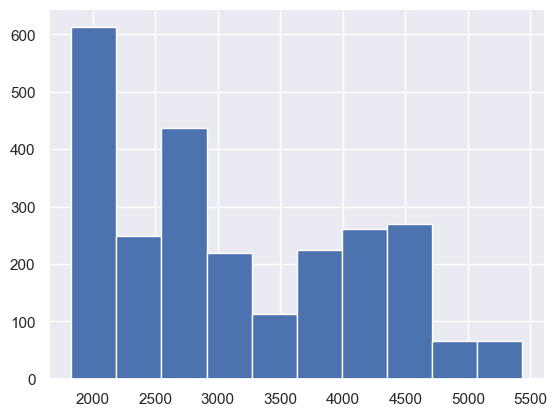

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5431.6

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3153.1882717520916

In [10]:
close_sd = df['Close/Last'].std()
close_sd

965.2357794434458

In [11]:
sigma1 = close_mean + close_sd
sigma1

4118.424051195538

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5083.659830638983

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5566.277720360706

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2529
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-06-17 to 2024-06-14')

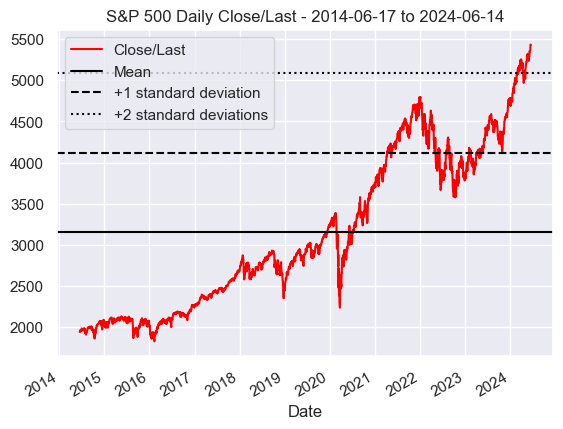

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-06-17 to 2024-06-14')

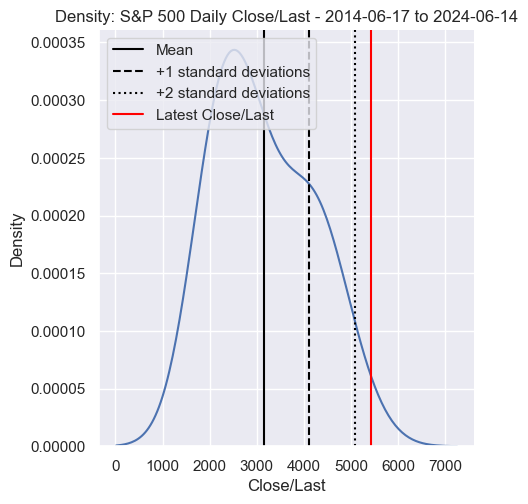

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.3604716865775934

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results